## 线性回归的概念
#### 1、线性回归的原理

#### 2、线性回归损失函数、代价函数、目标函数

#### 3、优化方法(梯度下降法、牛顿法、拟牛顿法等)

#### 4、线性回归的评估指标

#### 5、sklearn参数详解

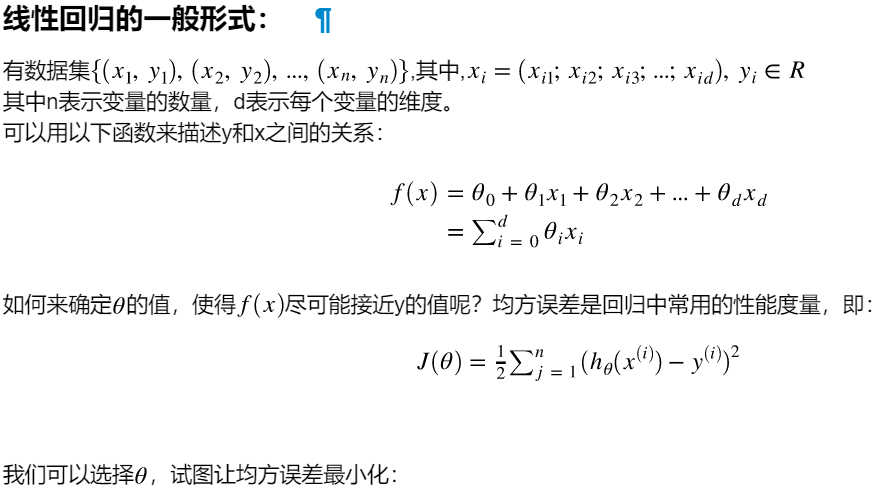

## 应该是1/n,该函数是loss function

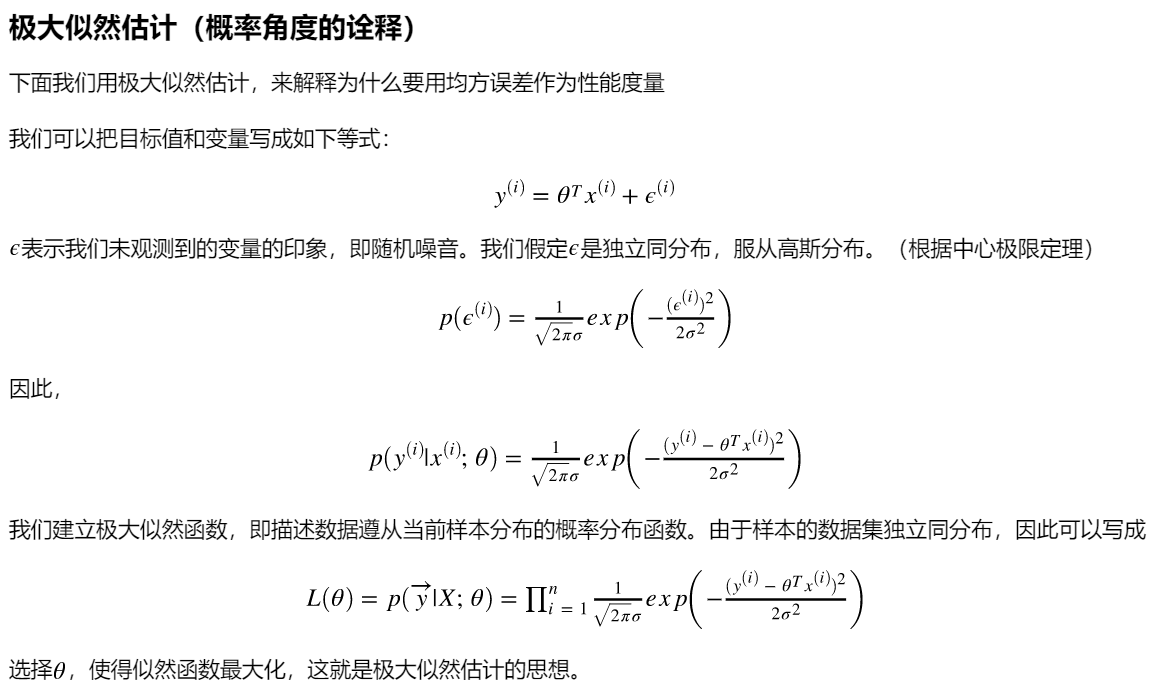

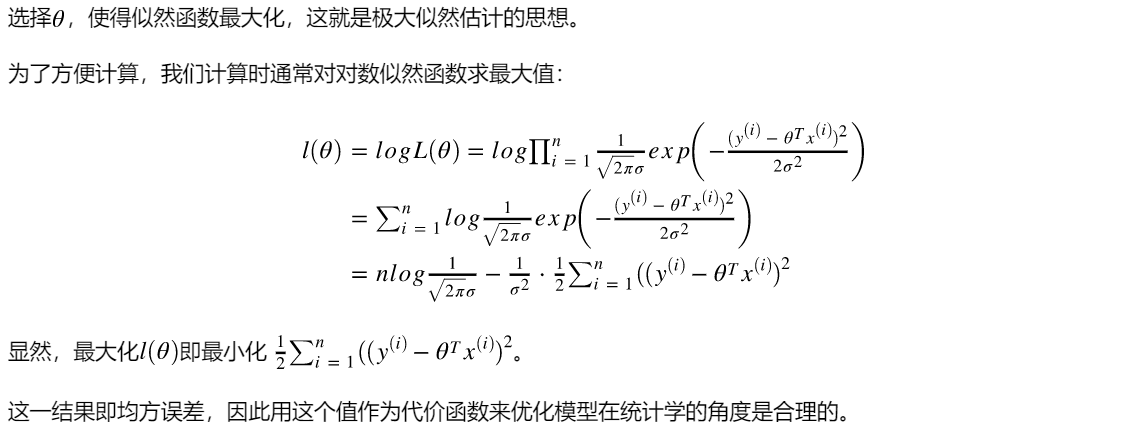

## 2、线性回归损失函数、代价函数、目标函数
* 损失函数(Loss Function)：度量单样本预测的错误程度，损失函数值越小，模型就越好。
* 代价函数(Cost Function)：度量全部样本集的平均误差。
* 目标函数(Object Function)：代价函数和正则化函数，最终要优化的函数。

常用的损失函数包括：0-1损失函数、平方损失函数、绝对损失函数、对数损失函数等；常用的代价函数包括均方误差、均方根误差、平均绝对误差等。

当模型复杂度增加时，有可能对训练集可以模拟的很好，但是预测测试集的效果不好，出现过拟合现象，这就出现了所谓的“结构化风险”。结构风险最小化即为了防止过拟合而提出来的策略，定义模型复杂度为$J(F)$，目标函数可表示为：

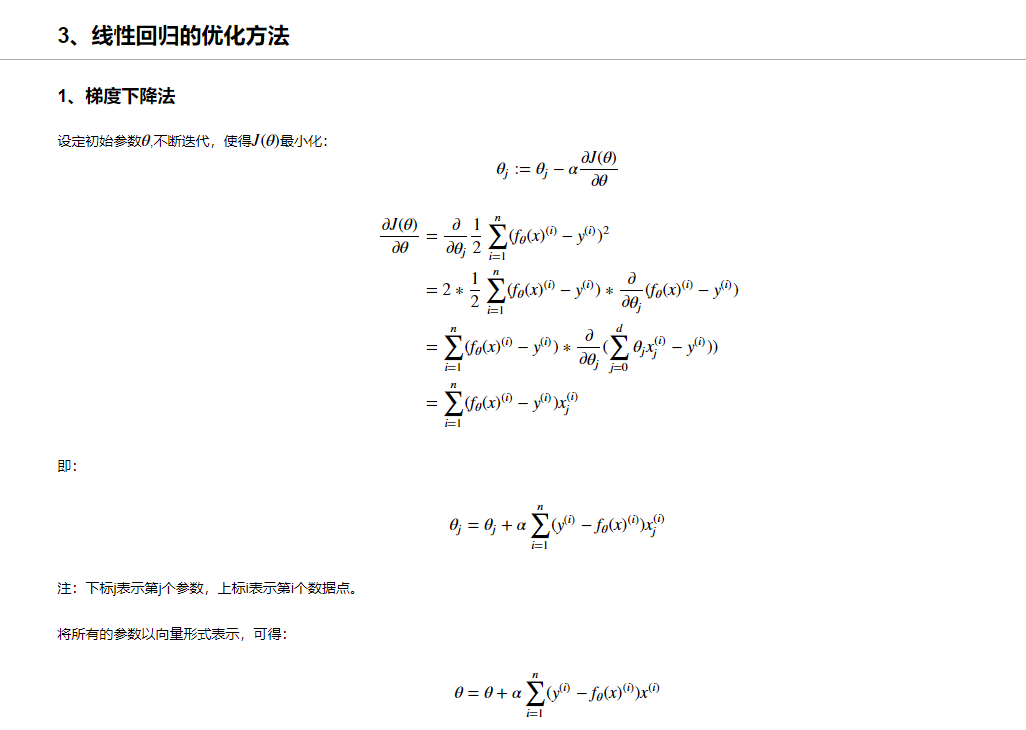

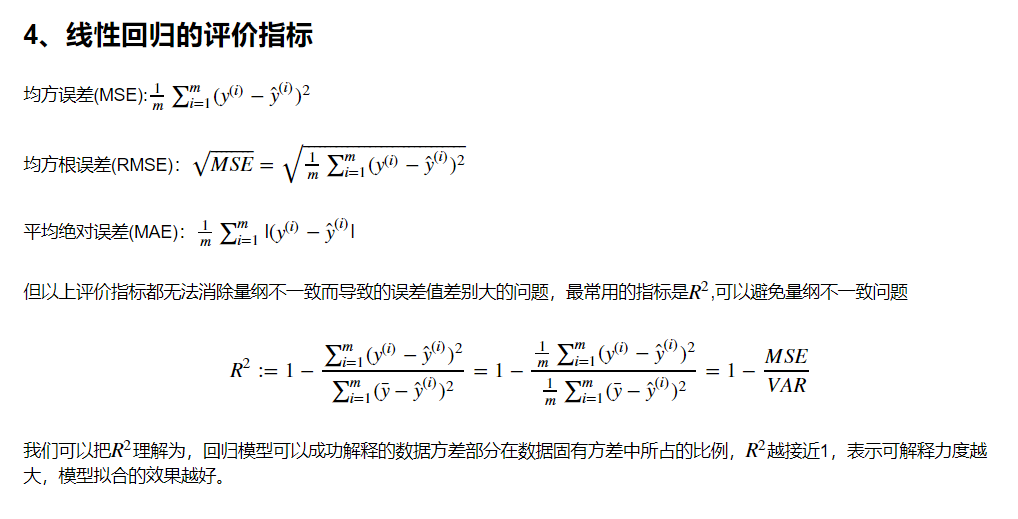

In [1]:
import numpy as np
np.random.seed(42)
x = np.random.rand(500,3)

In [3]:
y = x.dot(np.array([4.2,5.7,10.8]))

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)
print("估计的参数值为：%s" %(lr.coef_))
print('R2:%s' %(lr.score(x,y)))
x_test = np.array([2,4,5]).reshape(1,-1)
y_hat = lr.predict(x_test)
print("预测值为: %s" %(y_hat))

估计的参数值为：[ 4.2  5.7 10.8]
R2:1.0
预测值为: [85.2]


In [8]:
class LR_LS():
    def __init__(self):
        self.w = None      
    def fit(self, X, y):
        # 最小二乘法矩阵求解
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred

if __name__ == "__main__":
    lr_ls = LR_LS()
    lr_ls.fit(x,y)
    print("估计的参数值：%s" %(lr_ls.w))
    x_test = np.array([2,4,5]).reshape(1,-1)
    print("预测值为: %s" %(lr_ls.predict(x_test)))


估计的参数值：[ 4.2  5.7 10.8]
预测值为: [85.2]


In [9]:
class LR_GD():
    def __init__(self):
        self.w = None     
    def fit(self,X,y,alpha=0.02,loss = 1e-10): # 设定步长为0.002,判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((d)) #将参数的初始值定为0
        tol = 1e5
        #============================= show me your code =======================
        while tol > loss:
            h_f = X.dot(self.w).reshape(-1,1) 
            theta = self.w + alpha*np.mean(X*(y - h_f),axis=0) #计算迭代的参数值
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LR_GD()
    lr_gd.fit(x,y)
    print("估计的参数值为：%s" %(lr_gd.w))
    x_test = np.array([2,4,5]).reshape(1,-1)
    print("预测值为：%s" %(lr_gd.predict(x_test)))

估计的参数值为：[ 4.20000003  5.69999999 10.79999997]
预测值为：[85.19999991]
